# **Table of content**

1)Problem Statement

2)Hypothesis Generation

3)Loading Packages and Data

4)Data Structure and Content

5)Exploratory Data Analysis

6)Univariate Analysis

7)Bivariate Analysis

8)Missing Value Treatment

9)Feature Engineering

10)Encoding Categorical Variables

11)Label Encoding

12)One Hot Encoding

13)PreProcessing Data

14)Modeling

15)Linear Regression

16)Regularized Linear Regression

17)RandomForest

18)XGBoost

 19)Summary



# **Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

**Use of model :**
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation  



--> Location of the store might affect the sales 

--> Number of similar stores near to the store might affect the sales

--> Item weight might affect the sales

-->  Effect of type of item 

--> Size and ease of reach to the store effects the sales 

-->  Sales depends on quality of the product 

--> Price of product affect the sales 

--> Item contents also affect the sale

--> Discount might increase sales



# Loading Packages and Data

In [118]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [119]:
train = pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [120]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**This shows that the train and test data is imported successfully**

# Data Structure and Content

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [123]:
print(train.shape)
print(test.shape)


(8523, 12)
(5681, 11)


In [124]:
df_missing_value = train.isnull().sum()
df_missing_value    # Item_weight and Item_size having null value  ##   {df_missing_value = df.isnull().sum()}

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [125]:
train.columns # all column names in tarin data set 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [126]:
test.columns # all column name in test data set

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

**Observations**

--> Total 8523 rows are present in  training data set and 5681 rows in test data set 

--> different type of data present in the data set (like int,float,object)

--> Item_weight and outlet_size having null value  

--> all necessary column present in test and train data

--> There are 4 float type variables, 1 integer type and 7 object type

-->**Numerical features**

Item_Weight

Item_Visibility

Item_MRP

Item_Outlet_Sales(**Target Variable**)

**categorical data**

 Item_Fat_Content(Ordinal Feature)

 Item_Type

 Outlet_Itemtifier

 Outlet_Establishment_Year

 Outlet_Size(Ordinal Feature)

 Outlet__Location_Type(Ordinal Feature)

 Ootlet_Type(Ordinal Feature)

# Exploratory Data Analysis

In [127]:
# categorical data Item_Identifier

# Item_Fat_Content(Ordinal Feature)
# Item_Type
# Outlet_Itemtifier
# Outlet_Establishment_Year
# Outlet_Size(Ordinal Feature)
# Outlet__Location_Type(Ordinal Feature)
# Ootlet_Type(Ordinal Feature)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


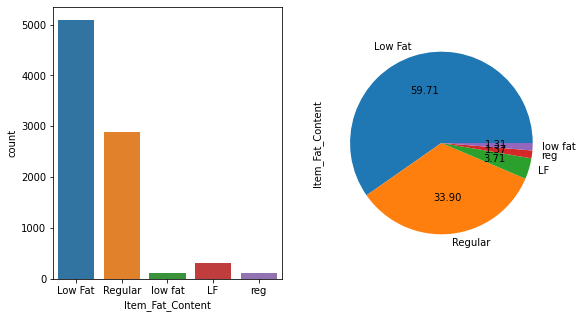

In [128]:
fig = plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.countplot(train['Item_Fat_Content'])
plt.subplot(1,2,2)
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%.2f')

In [129]:



train['Item_Type'].nunique()


16

In [130]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


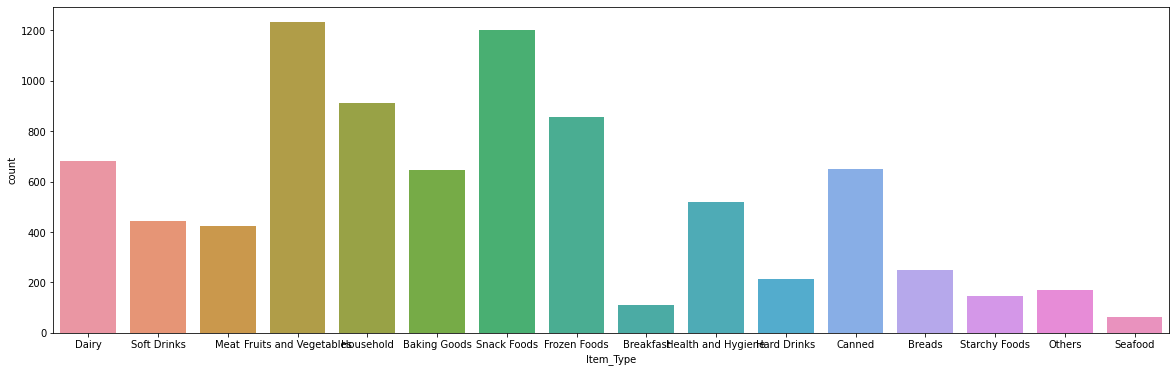

In [131]:

fig = plt.figure(figsize=(20,6))
sns.countplot(train['Item_Type'])


vegetables , snack food , frozen food are in demand 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

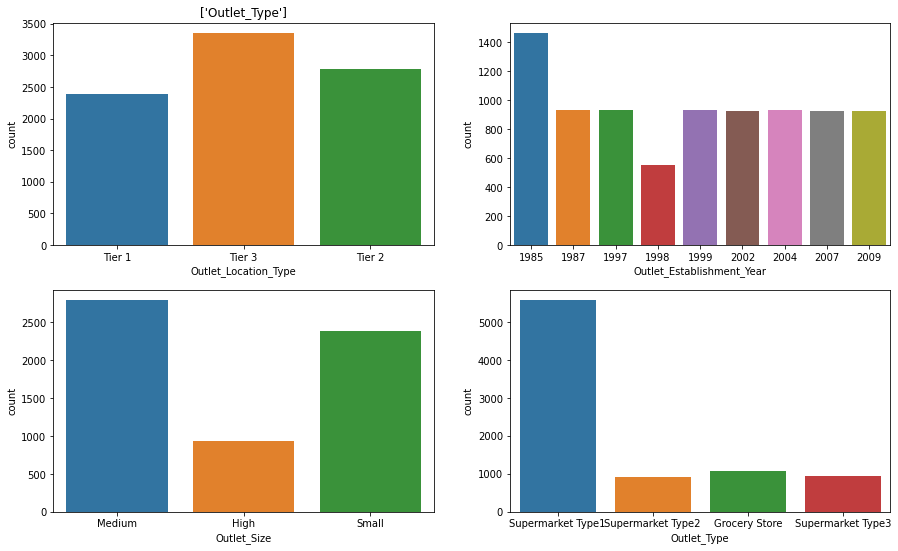

In [132]:

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.countplot(train['Outlet_Location_Type'])
ax1.title.set_text('Outlet_Location_Type')


ax2 = fig.add_subplot(222)
sns.countplot(train['Outlet_Establishment_Year'])
ax1.title.set_text('Outlet_Establishment_Year')

ax3 = fig.add_subplot(223)
sns.countplot(train['Outlet_Size'])
ax1.title.set_text('Outlet_Size')

ax4 = fig.add_subplot(224)
sns.countplot(train['Outlet_Type'])
ax1.title.set_text(['Outlet_Type'])



seems Supermarket type1 having more sell 

In [133]:
# # numerical coulmn

# Item_Weight
# Item_Visibility
# Item_MRP
# Item_Outlet_Sales(Target Variable)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

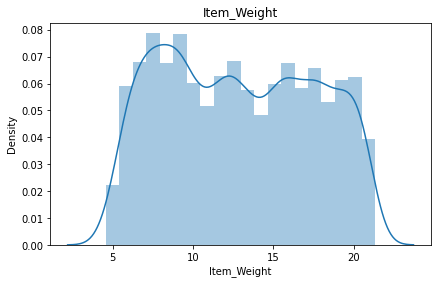

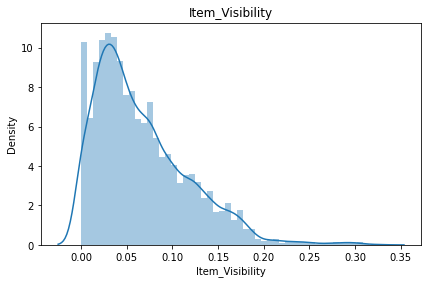

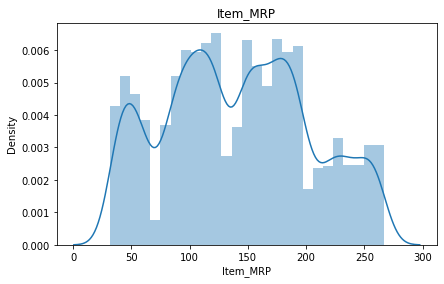

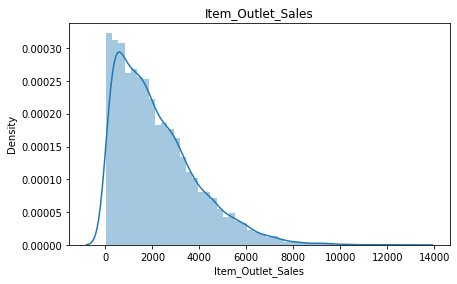

In [134]:

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.distplot(train['Item_Weight'])
ax1.title.set_text('Item_Weight')

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(222)
sns.distplot(train['Item_Visibility'])
ax1.title.set_text('Item_Visibility')

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(223)
sns.distplot(train['Item_MRP'])
ax1.title.set_text('Item_MRP')


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(224)
sns.distplot(train['Item_Outlet_Sales'])
ax1.title.set_text('Item_Outlet_Sales')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

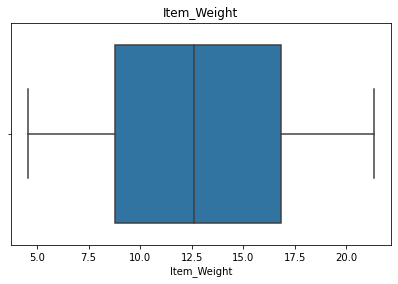

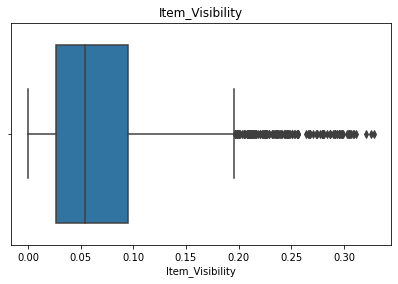

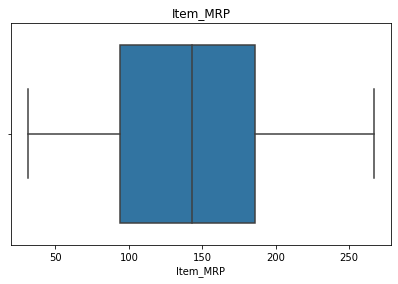

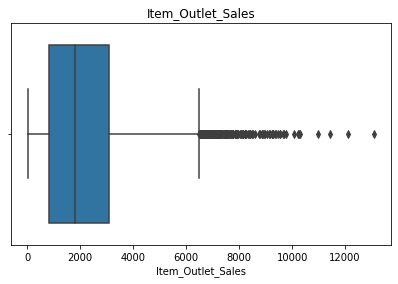

In [135]:

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.boxplot(train['Item_Weight'])
ax1.title.set_text('Item_Weight')

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(222)
sns.boxplot(train['Item_Visibility'])
ax1.title.set_text('Item_Visibility')

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(223)
sns.boxplot(train['Item_MRP'])
ax1.title.set_text('Item_MRP')


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(224)
sns.boxplot(train['Item_Outlet_Sales'])
ax1.title.set_text('Item_Outlet_Sales')


In [136]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [137]:
# from pandas_profiling  import ProfileReport
# profi= ProfileReport(train,explorative=True)
# for intense exploration of data


--> Item_Visibility	 having outliers 

-->max weight is 21.3 kg and avg is near 13 kg 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

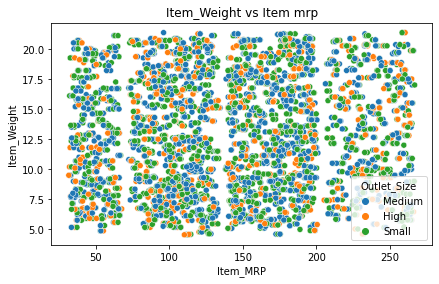

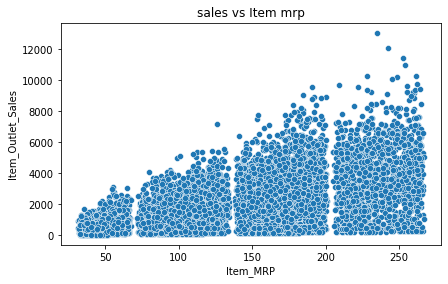

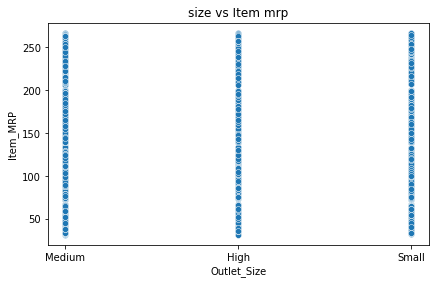

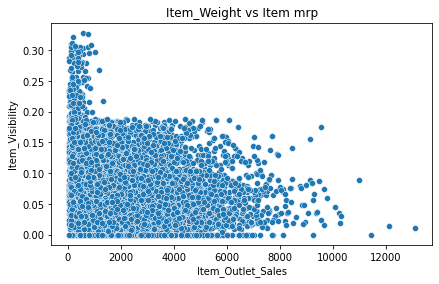

In [138]:
#Bivariate Analysis



fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.scatterplot(train['Item_MRP'],train['Item_Weight'],hue=train['Outlet_Size'])
ax1.title.set_text('Item_Weight vs Item mrp')


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.scatterplot(train['Item_MRP'],train['Item_Outlet_Sales'])
ax1.title.set_text('sales vs Item mrp')


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.scatterplot(train['Outlet_Size'],train['Item_MRP'])
ax1.title.set_text('size vs Item mrp')


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
sns.scatterplot(train['Item_Outlet_Sales'],train['Item_Visibility'])
ax1.title.set_text('Item_Weight vs Item mrp')



**observation**

--> all size of item available 

--> mrp increases sales increasing (may be more useful products are little bit costly)

--> no relation between weight and price of product 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


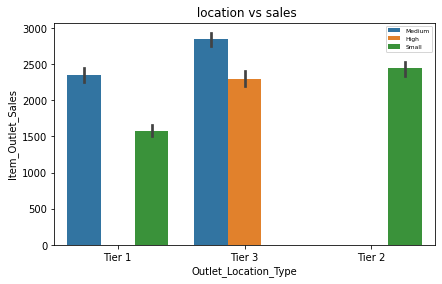

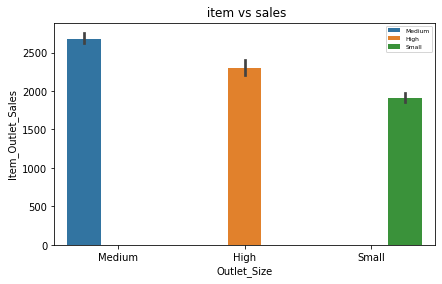

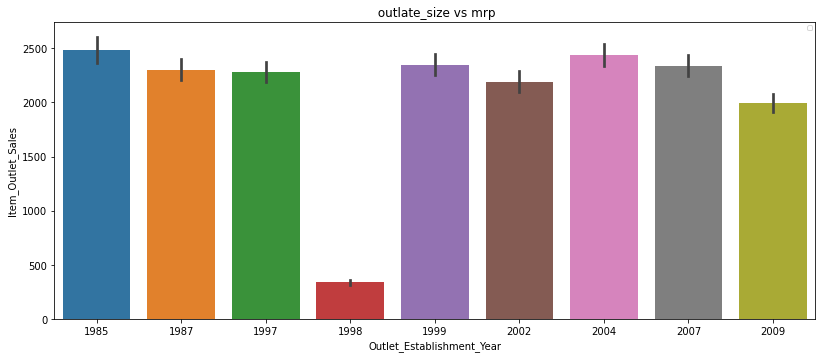

In [139]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
y=sns.barplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'])
ax1.title.set_text(' location vs sales')
plt.legend(loc='upper right')
y.legend(fontsize=6)


fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(221)
j=sns.barplot(train['Outlet_Size'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'])
ax1.title.set_text(' item vs sales')
plt.legend(loc='upper right')
j.legend(fontsize=6)


fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(221)
k=sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
ax1.title.set_text(' outlate_size vs mrp')
plt.legend(loc='upper right')
k.legend(fontsize=6)


**change in outlate sales year by year is affected by economical situation also  **

# 8).Missing Value Treatment

In [140]:
df_missing_value = train.isnull().sum()
df_missing_value    # Item_weight and Item_size having null value  ##   {df_missing_value = df.isnull().sum()}

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [141]:
miss_percent = [var for var in train.columns if train[var].isnull().mean()<0.5 and train[var].isnull().mean()>0]
miss_percent


['Item_Weight', 'Outlet_Size']

**['Item_Weight', 'Outlet_Size']** having much null value so can not delete data


In [142]:
#mean_weight = train['Item_Weight'].mean()
median_weight =train['Item_Weight'].median()

In [143]:
#train['Item_Weight'].fillna(train['Item_Weight'].mean())
print(train['Item_Weight'].var())

#train['Item_Weight_mean']=train['Item_Weight'].fillna(mean_weight)

21.561688259836558


In [144]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5443,DRK49,14.15,Low Fat,0.036000,Soft Drinks,41.5138,OUT049,1999,Medium,Tier 1,Supermarket Type1,162.4552
1655,FDX50,20.10,LF,0.074779,Dairy,110.7228,OUT045,2002,NaN,Tier 2,Supermarket Type1,1657.8420
4110,FDS46,17.60,Regular,0.047450,Snack Foods,118.1782,OUT018,2009,Medium,Tier 3,Supermarket Type2,2621.9204
5560,FDV26,20.25,Regular,0.076160,Dairy,196.2794,OUT046,1997,Small,Tier 1,Supermarket Type1,2731.1116
2929,FDI19,15.10,Low Fat,0.052329,Meat,243.1512,OUT035,2004,Small,Tier 2,Supermarket Type1,4604.6728


In [145]:
print(train['Item_Weight'].var())


21.561688259836558


<ipython-input-146-713646f47281>:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='upper_right')


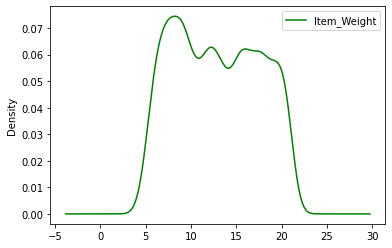

In [146]:
# # not  changing  graph ,so can be used 
fig=plt.figure()
ax =fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde',ax=ax,color='green')

plt.legend(loc='upper_right')

In [147]:
# #   changing  graph ,so cant be used 
# fig=plt.figure()
# ax =fig.add_subplot(111)
# train['Item_Weight'].plot(kind='kde',ax=ax,color='green')
# train['Item_Weight_median'].plot(kind='kde',ax=ax, color='red')
# plt.legend(loc='upper_right')

deviating from its original form


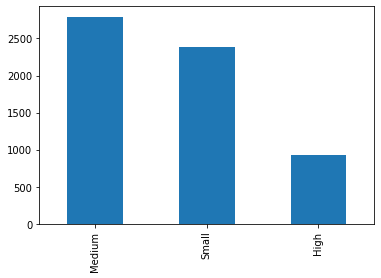

In [148]:
train['Outlet_Size'].value_counts().plot(kind='bar')

In [149]:
mod_size =train['Outlet_Size'].mode()


In [150]:
train['Item_Weight'].fillna(median_weight,inplace=True)



In [151]:
print(train['Item_Weight'].var())


17.869561454073647


In [152]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2514,FDN45,19.35,Low Fat,0.118103,Snack Foods,224.8088,OUT046,1997,Small,Tier 1,Supermarket Type1,2013.3792
1466,FDZ58,17.85,Low Fat,0.052167,Snack Foods,121.7072,OUT035,2004,Small,Tier 2,Supermarket Type1,2817.6656
7362,NCN41,17.00,Low Fat,0.087388,Health and Hygiene,125.0730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
1893,FDM33,15.60,Low Fat,0.000000,Snack Foods,220.4798,OUT018,2009,Medium,Tier 3,Supermarket Type2,661.1394
7221,FDP33,12.60,Low Fat,0.156304,Snack Foods,256.3672,OUT019,1985,Small,Tier 1,Grocery Store,255.6672


In [153]:


# any category not dominating so might be not giving good result
# filling with mode val



train['Outlet_Size'].fillna('Medium',inplace =True)


In [154]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
771,FDC10,12.600,Regular,0.072525,Snack Foods,120.3098,OUT027,1985,Medium,Tier 3,Supermarket Type3,1687.1372
6487,FDA49,19.700,Low Fat,0.064909,Canned,88.5198,OUT035,2004,Small,Tier 2,Supermarket Type1,1308.2970
373,FDX09,9.000,Low Fat,0.065237,Snack Foods,176.4370,OUT035,2004,Small,Tier 2,Supermarket Type1,7763.2280
5059,NCC06,19.000,Low Fat,0.026964,Household,129.8336,OUT013,1987,High,Tier 3,Supermarket Type1,3451.5072
6740,NCM07,9.395,Low Fat,0.040125,Others,85.1908,OUT018,2009,Medium,Tier 3,Supermarket Type2,1342.2528


In [155]:
# outlier remove

In [156]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df
    

In [157]:
train = remove_outliers_iqr(train, 'Item_Visibility')


In [158]:
train = remove_outliers_iqr(train, 'Item_Weight')


# Feature Engineering

In [159]:
#having category


# Item_Fat_Content(Ordinal Feature)
# Item_Type
# Outlet_Itemtifier
# Outlet_Establishment_Year
# Outlet_Size(Ordinal Feature)
# Outlet__Location_Type(Ordinal Feature)
# Ootlet_Type(Ordinal Feature) 

print(train['Item_Fat_Content'].unique())
# print(train['Item_Fat_Content'].unique().sum())
print(train['Outlet_Size'].unique())
# print(train['Outlet_Size'].unique().sum())
print(train['Outlet_Location_Type'].unique())
# print(train['Outlet_Location_Type'].unique().sum())
print(train['Outlet_Type'].unique())
# print(train['Outlet_Type'].unique().sum())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [160]:
# # Outlet_Itemtifier, Item_identifire
# are not that much related to sales so droping 

train.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)


In [161]:
print(train['Outlet_Size'].isnull().sum())

0


In [162]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:

train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [164]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


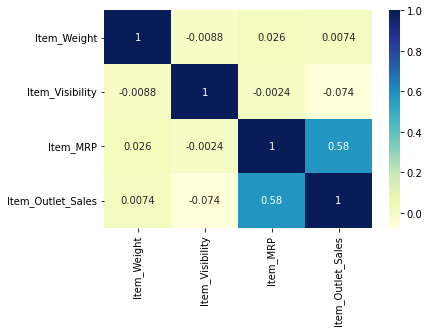

In [165]:
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [166]:
#no data is muchh related

# Encoding Categorical Variables

In [167]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                                

In [168]:
train = train.apply(le.fit_transform)

In [169]:
train .sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2772,314,1,6435,14,4757,1,0,1,2841
1439,280,2,6487,13,3457,2,1,1,1709
4510,357,1,3141,5,4122,2,0,1,1300
4207,322,2,6333,14,2523,1,2,3,1535
3124,280,2,4307,5,1197,2,0,1,1175


In [170]:
# One hot encoding improves performance

In [171]:
train= pd.get_dummies(train, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [172]:
train.sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
1955,294,1297,3,2331,1226,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1579,322,7662,4,2039,1459,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
5428,20,1335,1,1577,1764,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4253,321,5279,6,1367,1054,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
5823,406,4688,9,999,1165,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [173]:
train.shape

(8379, 20)

In [174]:


target_col = "Item_Outlet_Sales"
X = train.loc[:, train.columns != target_col]
y = train.loc[:, target_col]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [176]:
X_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
2092,408,2343,14,3221,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
8126,166,6652,15,4763,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2730,308,3910,0,5489,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
7908,291,446,14,362,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
1932,322,5024,5,852,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,125,2380,5,5425,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
5276,362,703,5,1634,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
5480,252,4884,6,4327,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
872,394,4232,0,3589,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [177]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [178]:
X_train_std= sc.fit_transform(X_train)

In [179]:
X_train_std

array([[ 1.15384649, -0.53799483,  1.60939356, ..., -1.4136712 ,
        -0.35243342, -0.35912416],
       [-1.39439163,  1.28893939,  1.84845479, ...,  0.70737807,
        -0.35243342, -0.35912416],
       [ 0.10085553,  0.12638343, -1.73746353, ...,  0.70737807,
        -0.35243342, -0.35912416],
       ...,
       [-0.48881941,  0.53934094, -0.3030962 , ...,  0.70737807,
        -0.35243342, -0.35912416],
       [ 1.00642775,  0.26290532, -1.73746353, ...,  0.70737807,
        -0.35243342, -0.35912416],
       [-0.24663149,  1.19863143, -0.54215743, ...,  0.70737807,
        -0.35243342, -0.35912416]])

In [180]:
x_test_std = sc.fit_transform(X_test)

In [181]:
x_test_std

array([[ 0.27364309, -1.5771693 , -0.97558727, ..., -1.40414786,
        -0.35402785, -0.34326396],
       [-1.93041825, -0.52939133,  0.67047072, ...,  0.71217571,
        -0.35402785, -0.34326396],
       [ 0.78548672, -1.5771693 , -1.44588955, ...,  0.71217571,
        -0.35402785, -0.34326396],
       ...,
       [-0.03973056, -0.83916546, -0.97558727, ...,  0.71217571,
        -0.35402785, -0.34326396],
       [ 0.06472732,  0.69223512, -0.74043613, ...,  0.71217571,
        -0.35402785, -0.34326396],
       [ 0.39899255,  1.44983953, -0.74043613, ...,  0.71217571,
        -0.35402785, -0.34326396]])

In [182]:
X_test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
2912,322,0,3,1083,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
8309,111,2459,10,3936,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7495,371,0,1,1264,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4934,396,2173,14,685,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
5759,404,7234,4,5733,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,239,5922,3,547,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3404,322,5473,1,4667,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5648,292,1732,3,2257,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1817,302,5326,4,4484,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


# Modeling

In [183]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [184]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [185]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
2912,322,0,3,1083,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
8309,111,2459,10,3936,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7495,371,0,1,1264,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4934,396,2173,14,685,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
5759,404,7234,4,5733,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0


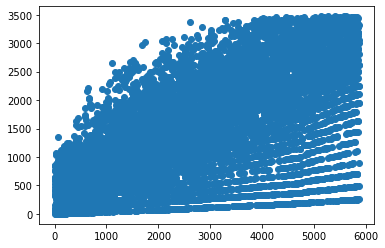

In [186]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])
# plt.plot(train['Item_MRP'], lr.predict(x_test_std))

In [187]:
lr.predict(x_test_std)

array([-187.47247365, 2022.08920831, 1121.04259614, ..., 1457.78847039,
       2188.22057551, 2606.02362245])

In [188]:
y_test

2912     369
8309    1636
7495    1456
4934     727
5759     696
        ... 
256      248
3404    3267
5648    1058
1817    2783
3676    1794
Name: Item_Outlet_Sales, Length: 2514, dtype: int64

In [189]:
y_pred_lr =lr.predict(x_test_std)

In [190]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [191]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.6099229472106664
442.28411181482846
560.3431818385378


In [192]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [193]:
rf.fit(X_train_std,y_train)

RandomForestRegressor()

In [194]:
Y_pread_rf = rf.predict(x_test_std)

In [195]:
print(r2_score(y_test,Y_pread_rf))
print(mean_absolute_error(y_test,Y_pread_rf))
print(np.sqrt(mean_squared_error(y_test,Y_pread_rf)))

0.5995701683806511
427.13974542561647
567.7303385491643


In [196]:
# Regularized Linear Regression 
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.5)

In [197]:
reg.fit(X_train_std,y_train)

Ridge(alpha=0.5)

In [198]:
Y_pread_reg = reg.predict(x_test_std)

In [199]:
print(r2_score(y_test,Y_pread_reg))
print(mean_absolute_error(y_test,Y_pread_reg))
print(np.sqrt(mean_squared_error(y_test,Y_pread_reg)))

0.6099262765880904
442.28599689269925
560.3407905187886


In [200]:
# XGBOOST
from xgboost import XGBRegressor



In [201]:
regresor = XGBRegressor()

In [202]:
regresor.fit(X_train_std,y_train)

[17:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [203]:
Y_pread_xg = regresor.predict(x_test_std)

In [204]:
print(r2_score(y_test,Y_pread_xg))
print(mean_absolute_error(y_test,Y_pread_xg))
print(np.sqrt(mean_squared_error(y_test,Y_pread_xg)))

0.6265206608477749
413.5000651456007
548.2923435863713


# Test Data set

In [205]:
# test data set 

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [206]:
miss_percent1 = [var for var in test.columns if test[var].isnull().mean()<0.5 and test[var].isnull().mean()>0]
miss_percent1


['Item_Weight', 'Outlet_Size']

In [207]:
median_weight1 =test['Item_Weight'].median()

In [208]:
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2716,NCG55,16.25,Low Fat,0.039139,Household,116.1176,OUT035,2004,Small,Tier 2,Supermarket Type1
1556,FDI41,18.50,Regular,0.062354,Frozen Foods,145.4418,OUT049,1999,Medium,Tier 1,Supermarket Type1
2810,FDA14,16.10,Low Fat,0.065552,Dairy,146.4760,OUT017,2007,NaN,Tier 2,Supermarket Type1
566,FDR10,NaN,Low Fat,0.009991,Snack Foods,161.5552,OUT027,1985,Medium,Tier 3,Supermarket Type3
4820,FDS49,NaN,Low Fat,0.138924,Canned,78.4644,OUT019,1985,Small,Tier 1,Grocery Store


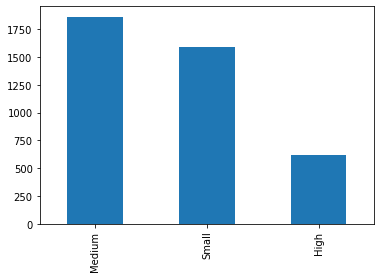

In [209]:
test['Outlet_Size'].value_counts().plot(kind='bar')

In [210]:
test['Item_Weight'].fillna(median_weight,inplace=True)



In [211]:

test['Outlet_Size'].fillna('Medium',inplace =True)

In [212]:
test.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)


In [213]:

test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [214]:
test = test.apply(le.fit_transform)

In [215]:
test.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
1517,135,0,3590,4,858,1,2,0
1290,291,2,895,0,2915,2,0,1
5356,362,2,2776,0,1258,2,0,1
2286,120,1,2743,8,4386,1,1,1
1422,163,4,938,13,3283,2,1,1


In [216]:
test= pd.get_dummies(test, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [217]:
 X_test_1= sc.fit_transform(test)

In [218]:
y_pred_test_lr  =lr.predict(X_test_1)


In [219]:
y_pred_test_lr # linear regression model test output 

array([1348.96659224, 1062.53496989, 1208.53706578, ..., 1458.44295491,
       2325.70029751, 1057.2004315 ])

In [220]:
Y_pread_test_rf = rf.predict(X_test_1)


In [221]:
Y_pread_test_rf   # random forest  model test output 

array([1469.05, 1029.96,  756.7 , ..., 1596.69, 2342.59, 1228.46])

In [222]:
Y_pread_test_xg = regresor.predict(X_test_1)

In [223]:
Y_pread_test_xg   # xgboost  model test output  

array([1295.2782 , 1129.5695 ,  551.09784, ..., 1471.0226 , 2336.6677 ,
       1035.3949 ], dtype=float32)

# Summary

 bigmart data set having  8523   rows and  12  features there are 7 categorical features and 4 numerical features and last is numerical target feature . performed EDA and after cleaning data and removing null values by median and mod imputer , categorical data incoding (one hot and label encoding ) , standerization done and final step was model building and pedicting data . linear regression ,random forest , xgboost used for that , best performing model is Xgboost.

In [224]:
l= [ 'T','H','A','N','K','Y','O','U']

for i in l :
  print(i)

T
H
A
N
K
Y
O
U
